# Проверочное задание. Операции с данными. App Store.

In [2]:
# Импортируй библиотеку pandas
import pandas as pd

In [3]:
import matplotlib.pyplot as plt # для создания диаграмм
import seaborn as sns           # для создания диаграмм

In [4]:
# Примонтируй Google Drive.
# В процессе выполнения кода этой ячейки перейди по длинной ссылке, скопируй код, вставь его
# в поле ввода и нажми <Enter>. Твой личный Google-диск "примонтируется", его папки
# станут видны в разделе файловой структуры слева.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Размести на Google Drive файл 17k-apple-app-store-strategy-games.zip из материалов к заданию и загрузи его в dataframe
# Описание датасета: https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games
# Затем выведи фрагмент датасета

df = pd.read_csv('/content/drive/MyDrive/mydata/17k-apple-app-store-strategy-games.zip')


In [7]:
# Выведи описательные статистики
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


In [8]:
# Проверь типы данных
df.dtypes

URL                              object
ID                                int64
Name                             object
Subtitle                         object
Icon URL                         object
Average User Rating             float64
User Rating Count               float64
Price                           float64
In-app Purchases                 object
Description                      object
Developer                        object
Age Rating                       object
Languages                        object
Size                            float64
Primary Genre                    object
Genres                           object
Original Release Date            object
Current Version Release Date     object
dtype: object

In [9]:
# Удали признаки, перечисленные в списке:
features_to_remove = [
  'URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'In-app Purchases', 'Description', 'Developer', 'Languages', 'Original Release Date', 'Primary Genre',	'Current Version Release Date',
]
df.drop(features_to_remove, axis=1)
df.head(5)


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [10]:
# Переименуй столбцы так, чтобы в названии оставшихся признаков не было пробелов
df.columns = df.columns.str.replace(" ", "")
df.head(5)

,URL,ID,Name,Subtitle,IconURL,AverageUserRating,UserRatingCount,Price,In-appPurchases,Description,Developer,AgeRating,Languages,Size,PrimaryGenre,Genres,OriginalReleaseDate,CurrentVersionReleaseDate
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [11]:
# Удали все строки с NaN
df.dropna(inplace=True)
df.head(5)

,URL,ID,Name,Subtitle,IconURL,AverageUserRating,UserRatingCount,Price,In-appPurchases,Description,Developer,AgeRating,Languages,Size,PrimaryGenre,Genres,OriginalReleaseDate,CurrentVersionReleaseDate
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
19,https://apps.apple.com/us/app/cool-sudoku-jigs...,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,357.0,0.00,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,4+,EN,52236288.0,Games,"Games, Strategy, Puzzle, Entertainment",24/09/2008,26/04/2019
75,https://apps.apple.com/us/app/gun-runner/id306...,306165224,Gun Runner +,A trading game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,5462.0,0.00,"0.99, 0.99, 0.99","""Gun Runner + is a lite & free version of Gun ...",CUBIC digital,9+,EN,14125056.0,Games,"Games, Entertainment, Adventure, Strategy",25/02/2009,28/09/2017
90,https://apps.apple.com/us/app/uniwar-multiplay...,311456818,UniWar: Multiplayer Strategy,Turn-Based Strategy game,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,14073.0,0.00,"9.99, 2.99, 4.99, 19.99, 5.49, 23.49, 49.99, 3...",Players take turns building their army and fig...,SH Limited,9+,"AR, ZH, CS, EN, FR, DE, IT, JA, PL, PT, RU, ES...",115074048.0,Games,"Games, Entertainment, Strategy, Role Playing",14/04/2009,24/07/2019
106,https://apps.apple.com/us/app/towermadness/id3...,316491616,TowerMadness,Classic Defense Strategy,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,42389.0,2.99,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99...",Evil aliens are coming to turn your beloved sh...,Limbic Software,9+,"EN, DE",56048640.0,Games,"Games, Strategy, Puzzle",24/05/2009,5/03/2018


In [12]:
# Проверь количество NaN, должно быть 0.
df.isnull().sum().sum ()

0

In [13]:
# Переиндексируй датафрейм
df.reset_index()
df.head(5)

,URL,ID,Name,Subtitle,IconURL,AverageUserRating,UserRatingCount,Price,In-appPurchases,Description,Developer,AgeRating,Languages,Size,PrimaryGenre,Genres,OriginalReleaseDate,CurrentVersionReleaseDate
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
19,https://apps.apple.com/us/app/cool-sudoku-jigs...,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,357.0,0.00,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,4+,EN,52236288.0,Games,"Games, Strategy, Puzzle, Entertainment",24/09/2008,26/04/2019
75,https://apps.apple.com/us/app/gun-runner/id306...,306165224,Gun Runner +,A trading game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,5462.0,0.00,"0.99, 0.99, 0.99","""Gun Runner + is a lite & free version of Gun ...",CUBIC digital,9+,EN,14125056.0,Games,"Games, Entertainment, Adventure, Strategy",25/02/2009,28/09/2017
90,https://apps.apple.com/us/app/uniwar-multiplay...,311456818,UniWar: Multiplayer Strategy,Turn-Based Strategy game,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,14073.0,0.00,"9.99, 2.99, 4.99, 19.99, 5.49, 23.49, 49.99, 3...",Players take turns building their army and fig...,SH Limited,9+,"AR, ZH, CS, EN, FR, DE, IT, JA, PL, PT, RU, ES...",115074048.0,Games,"Games, Entertainment, Strategy, Role Playing",14/04/2009,24/07/2019
106,https://apps.apple.com/us/app/towermadness/id3...,316491616,TowerMadness,Classic Defense Strategy,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,42389.0,2.99,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99...",Evil aliens are coming to turn your beloved sh...,Limbic Software,9+,"EN, DE",56048640.0,Games,"Games, Strategy, Puzzle",24/05/2009,5/03/2018


In [16]:
# Присвой признаку с возрастным рейтингом категориальный тип данных и проверь результат.
df['AverageUserRating'] = df['AverageUserRating'].astype('category')
df.dtypes

URL                            object
ID                              int64
Name                           object
Subtitle                       object
IconURL                        object
AverageUserRating            category
UserRatingCount               float64
Price                         float64
In-appPurchases                object
Description                    object
Developer                      object
AgeRating                      object
Languages                      object
Size                          float64
PrimaryGenre                   object
Genres                         object
OriginalReleaseDate            object
CurrentVersionReleaseDate      object
dtype: object

In [22]:
# Сконвертируй признак с возрастным рейтингом в булев тип методом get_dummies()
# Покажи фрагмент датасета с результатом
pd.get_dummies(df, columns = ['AverageUserRating'], dtype=bool)
df.head(5)

,URL,ID,Name,Subtitle,IconURL,AverageUserRating,UserRatingCount,Price,In-appPurchases,Description,Developer,AgeRating,Languages,Size,PrimaryGenre,Genres,OriginalReleaseDate,CurrentVersionReleaseDate
5,https://apps.apple.com/us/app/sudoku-classic-n...,286210009,Sudoku - Classic number puzzle,Original brain training,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,47.0,0.00,1.99,"Sudoku will tease your brain, challenge you or...",OutOfTheBit Ltd,4+,EN,48672768.0,Games,"Games, Entertainment, Strategy, Puzzle",30/07/2008,29/04/2019
19,https://apps.apple.com/us/app/cool-sudoku-jigs...,290614255,"Cool Sudoku, Jigsaw, Killer","Sudoku, Jigsaw, Killer, Kakuro",https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,357.0,0.00,"0.99, 0.99, 0.99","You can now play Sudoku, Killer Sudoku, Jigsaw...",Splash Software Ltd.,4+,EN,52236288.0,Games,"Games, Strategy, Puzzle, Entertainment",24/09/2008,26/04/2019
75,https://apps.apple.com/us/app/gun-runner/id306...,306165224,Gun Runner +,A trading game,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,2.5,5462.0,0.00,"0.99, 0.99, 0.99","""Gun Runner + is a lite & free version of Gun ...",CUBIC digital,9+,EN,14125056.0,Games,"Games, Entertainment, Adventure, Strategy",25/02/2009,28/09/2017
90,https://apps.apple.com/us/app/uniwar-multiplay...,311456818,UniWar: Multiplayer Strategy,Turn-Based Strategy game,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,14073.0,0.00,"9.99, 2.99, 4.99, 19.99, 5.49, 23.49, 49.99, 3...",Players take turns building their army and fig...,SH Limited,9+,"AR, ZH, CS, EN, FR, DE, IT, JA, PL, PT, RU, ES...",115074048.0,Games,"Games, Entertainment, Strategy, Role Playing",14/04/2009,24/07/2019
106,https://apps.apple.com/us/app/towermadness/id3...,316491616,TowerMadness,Classic Defense Strategy,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,4.0,42389.0,2.99,"1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99, 1.99...",Evil aliens are coming to turn your beloved sh...,Limbic Software,9+,"EN, DE",56048640.0,Games,"Games, Strategy, Puzzle",24/05/2009,5/03/2018


In [24]:
# Сколько строк осталось в датасете после удаления NaN?
df.shape

(1935, 18)

In [28]:
# Создай срез, который выводит столбец 'Genres', а строки только те, где 'Rating' равен 5
# Какое количество строк возвращается?
print(df.loc[df['AverageUserRating'] == 5, ['Genres']])

                                       Genres
1431   Games, Strategy, Entertainment, Puzzle
1649   Games, Action, Entertainment, Strategy
1672   Games, Entertainment, Puzzle, Strategy
1789   Games, Strategy, Entertainment, Puzzle
1951                  Games, Puzzle, Strategy
...                                       ...
16740      Games, Puzzle, Education, Strategy
16748                 Games, Casino, Strategy
16758                   Games, Card, Strategy
16791                 Games, Casual, Strategy
16932       Utilities, Games, Board, Strategy

[288 rows x 1 columns]


<Axes: xlabel='AverageUserRating', ylabel='Price'>

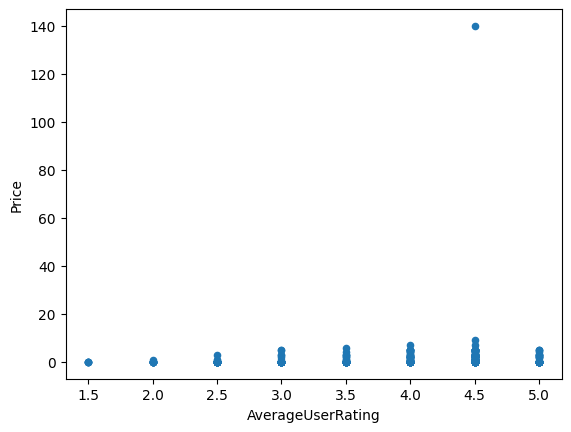

In [30]:
# Построй диаграмму рассеяния признаков Price vs Rating
df.plot.scatter(x = 'AverageUserRating', y = 'Price')

In [32]:
# Сколько игр стоит дороже 30?
print(len(df[(df.Price > 30)]))

1


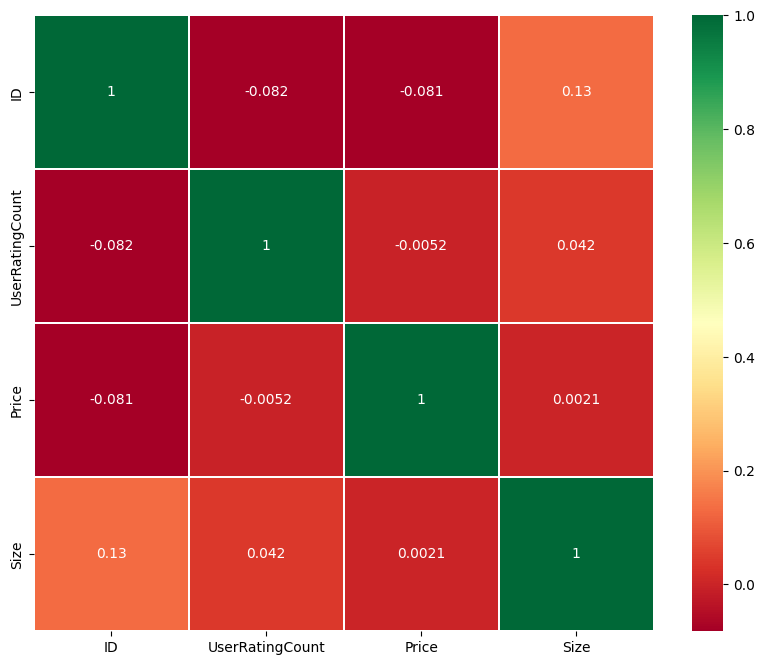

In [34]:
# Построй диаграмму корреляциий в датафрейме
# Используй sns.heatmap()
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True,cmap='RdYlGn',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Вопросы к заданию

ВОПРОС 1
Сколько признаков числового типа в исходном датасете?
Ответ: 5

ВОПРОС 2
Сколько строк осталось в датасете после удаления NaN?
Ответ: 1935

ВОПРОС 3
Какое количество строк возвращает срез, который выводит столбец 'Genres' для строк, где 'Rating' равен 5?
Ответ: 288

ВОПРОС 4
Судя по построенной диаграмме рассеяния, какой максимальной цены достигает стоимость игр?
Ответ: 140


ВОПРОС 5
Cколько игр дороже 30 есть в датасете после обработки?
Ответ: 1

ВОПРОС 6
Что можно сказать о корреляциях между числовыми признаками в датасете после обработки?
Ответ: Корреляция отрицательна.



###